In [1]:
import pandas as pd

data=pd.read_csv('train.csv')

In [2]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
cols=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
sdata=data[cols].sample(frac=1)

In [27]:
import numpy as np
from sklearn import preprocessing

def prepare(sdata):
    sdata['Age']=sdata['Age'].fillna(sdata['Age'].mean())
    sdata['Embarked']=sdata['Embarked'].fillna('S')
    print (sdata.isnull().sum())

    sdata['Sex']=sdata['Sex'].map({'female':0,'male':1}).astype(int)
    sdata['Embarked']=sdata['Embarked'].map({'C':0,'Q':1,'S':2}).astype(int) 

    print (sdata[:5])

    features=sdata.drop(['Survived'],axis=1) #DataFrame (891,7)
    f=features.values  #ndarray (891,7)

    scale=preprocessing.MinMaxScaler() 
    norm_features=scale.fit_transform(f) #ndarray (891,7)

    #scale.fit_transfrom()传入不管是features还是f，输出的都是ndarray数组
    #因此，我们最好还是令函数的返回值统一为ndarray类型
    labels=sdata[['Survived']] #DataFrame (891,1)
    labels=labels.values #ndarray (891,1)
    
    return norm_features,labels
    

In [28]:
norm_features,labels=prepare(sdata)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
     Survived  Pclass  Sex        Age  SibSp  Parch      Fare  Embarked
481         0       2    1  29.699118      0      0    0.0000         2
856         1       1    0  45.000000      1      1  164.8667         2
534         0       3    0  30.000000      0      0    8.6625         2
524         0       3    1  29.699118      0      0    7.2292         0
391         1       3    1  21.000000      0      0    7.7958         2


In [29]:
size=int(len(norm_features)*0.8)

x_train=norm_features[:size]
y_train=labels[:size]

x_test=norm_features[size:]
y_test=labels[size:]

<img src='网络结构.png'>

In [33]:
import tensorflow as tf

model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=64,
                                #input_shape=(7,)
                                input_dim=7,
                               activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))

model.add(tf.keras.layers.Dense(units=32,
                               activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))

model.add(tf.keras.layers.Dense(units=1,
                               activation='sigmoid'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                512       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


optimizer=tf.keras.optimizers.Adam(lr)
optimizer=tf.train.AdamOptimizer(lr)
optimizer='adam'

loss='binary_crossentropy' #输出层激活函数为sigmoid时
loss='categorical_crossentropy' #输出层激活函数为softmax时


In [35]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.003),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [36]:
train_history=model.fit(x=x_train,y=y_train,validation_split=0.2,
                        epochs=100,batch_size=40,verbose=2)

train_history.history.keys()

Train on 569 samples, validate on 143 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 1s - loss: 0.6574 - acc: 0.6327 - val_loss: 0.6365 - val_acc: 0.6364
Epoch 2/100
 - 0s - loss: 0.5850 - acc: 0.6977 - val_loss: 0.5714 - val_acc: 0.7413
Epoch 3/100
 - 0s - loss: 0.5254 - acc: 0.7487 - val_loss: 0.5316 - val_acc: 0.7692
Epoch 4/100
 - 0s - loss: 0.4897 - acc: 0.7786 - val_loss: 0.5182 - val_acc: 0.7622
Epoch 5/100
 - 0s - loss: 0.4969 - acc: 0.7750 - val_loss: 0.5046 - val_acc: 0.7762
Epoch 6/100
 - 0s - loss: 0.4844 - acc: 0.7873 - val_loss: 0.4893 - val_acc: 0.7622
Epoch 7/100
 - 0s - loss: 0.4833 - acc: 0.7592 - val_loss: 0.4800 - val_acc: 0.7692
Epoch 8/100
 - 0s - loss: 0.4691 - acc: 0.7786 - val_loss: 0.4736 - val_acc: 0.7832
Epoch 9/100
 - 0s - loss: 0.4679 - acc: 0.8032 - val_loss: 0.4674 - val_acc: 0.7762
Epoch 10/100
 - 0s - loss: 0.4565 - acc: 0.8120 - val_loss: 0.4728 - val_acc: 0.7972
Epoch 11/100
 - 0s - loss: 0.4590 - acc: 0.8032 - val_loss: 0.462

Epoch 94/100
 - 0s - loss: 0.3849 - acc: 0.8401 - val_loss: 0.4252 - val_acc: 0.8042
Epoch 95/100
 - 0s - loss: 0.4007 - acc: 0.8401 - val_loss: 0.4220 - val_acc: 0.8112
Epoch 96/100
 - 0s - loss: 0.3722 - acc: 0.8489 - val_loss: 0.4202 - val_acc: 0.8112
Epoch 97/100
 - 0s - loss: 0.3946 - acc: 0.8348 - val_loss: 0.4192 - val_acc: 0.8042
Epoch 98/100
 - 0s - loss: 0.3813 - acc: 0.8524 - val_loss: 0.4276 - val_acc: 0.8112
Epoch 99/100
 - 0s - loss: 0.3767 - acc: 0.8489 - val_loss: 0.4233 - val_acc: 0.8252
Epoch 100/100
 - 0s - loss: 0.3820 - acc: 0.8436 - val_loss: 0.4227 - val_acc: 0.8042


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [40]:
import matplotlib.pyplot as plt

def visualize(train_history,train_metric,valid_metric):
    plt.plot(train_history.history[train_metric])
    plt.plot(train_history.history[valid_metric])
    plt.xlabel('epoch')
    plt.ylabel(train_metric)
    plt.legend(['训练集','验证集'],loc='upper left')
    plt.show()
    

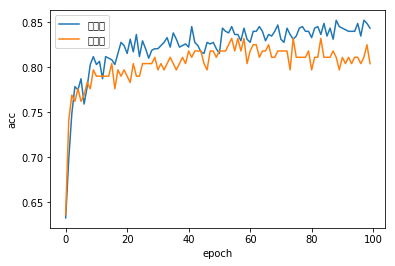

In [41]:
visualize(train_history,'acc','val_acc')

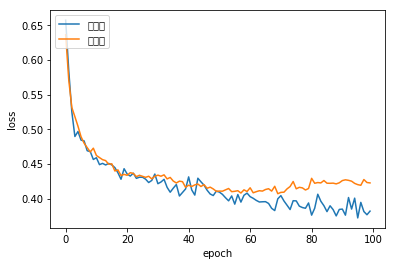

In [42]:
visualize(train_history,'loss','val_loss')

In [43]:
res=model.evaluate(x=x_test,y=y_test)
print (res)

179/179 [==============================] - 0s 49us/sample - loss: 0.4579 - acc: 0.7765
[0.45789865125490964, 0.7765363]


In [44]:
model.metrics_names

['loss', 'acc']

In [49]:
Jack=[0,3,'male',23,1,0,5.0000,'S']
Rose=[1,1,'female',20,1,0,100.0000,'S']
JR=pd.DataFrame([Jack,Rose],columns=cols)
x,y=prepare(JR)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
   Survived  Pclass  Sex  Age  SibSp  Parch   Fare  Embarked
0         0       3    1   23      1      0    5.0         2
1         1       1    0   20      1      0  100.0         2


In [50]:
model.predict(x) 

array([[0.03270664],
       [0.9988212 ]], dtype=float32)